   Feature1  Feature2  Target
0  2.067788  0.258133       1
1  0.993994 -0.609145       1
2 -0.690315  0.749921       0
3  1.023582  0.529003       0
4  0.700747 -0.496724       1

[5 rows x 3 columns]
(500, 2) (500,)
Within Session.
W & B :
[[ 7.76464653 -6.45013666]
 [ 5.0232439  -3.4510324 ]
 [-7.28585196  7.38891983]
 [ 4.30925655 -5.52841234]]   [-4.0287652  4.0287776]
Error:  0.0320000052452


/usr/lib/python3/dist-packages/matplotlib/collections.py:549: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == 'face':


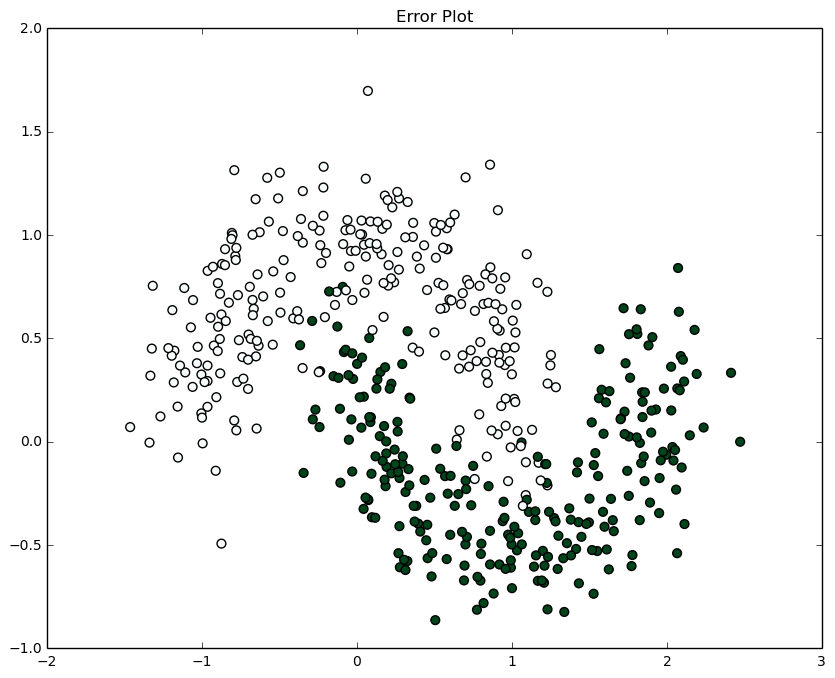

In [15]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import scipy
import math
import random
import string
import tensorflow as tf

random.seed(123)
get_ipython().magic('matplotlib inline')
matplotlib.rcParams['figure.figsize'] = (10.0, 8.0)
train = pd.read_csv("Course/code/data/intro_to_ann.csv")
print (train.head())
X, Y = np.array(train.ix[:,0:2]), np.array(train.ix[:,2])
print(X.shape, Y.shape)
plt.scatter(X[:,0], X[:,1], s=40, c=Y, cmap=plt.cm.BuGn)
onehotVec = (np.arange(2) == Y[:, None]).astype(np.float32)
x = tf.placeholder(tf.float32, shape=[None, 2])
y = tf.placeholder(tf.float32, shape=[None, 2])
W1 = tf.Variable(tf.random_normal([2, 4]))
b1 = tf.Variable(tf.zeros([4]))
W2 = tf.Variable(tf.random_normal([4, 2]))
b2 = tf.Variable(tf.zeros([2]))
L1 = tf.nn.sigmoid(tf.add(tf.matmul(x,W1), b1))
L2 = tf.nn.softmax(tf.add(tf.matmul(L1,W2), b2))

cross_entropy = tf.reduce_mean(-tf.reduce_sum(y*tf.log(L2)))
train_step = tf.train.GradientDescentOptimizer(0.01).minimize(cross_entropy)
init = tf.initialize_all_variables()
errors = []
with tf.Session() as sess:
    sess.run(init)
    correct_prediction = tf.equal(tf.argmax(L2,1), tf.argmax(y,1))
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
    print('Within Session.')
    for step in range(2000):
        sess.run(train_step, feed_dict={x: X, y: onehotVec})
        accuracy_value = sess.run(accuracy, feed_dict={x: X, y: onehotVec})
        errors.append(1 - accuracy_value)
    print('W & B :')
    print(sess.run(W2), " ", sess.run(b2))
    print("Error: ", errors[-1])
    plt.title('Error Plot')
